<a href="https://colab.research.google.com/github/alvinastr/Everin/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Gathering

In [ ]:
import pandas as pd

# Load the two datasets
cuisine_df = pd.read_csv('data/cuisine.csv')
instant_df = pd.read_csv('data/instant.csv')

# Combine both datasets into a single DataFrame
combined_df = pd.concat([cuisine_df, instant_df], ignore_index=True)

# Display first few rows of the combined dataset
print("Combined Dataset (cuisine.csv + instant.csv):")
print(combined_df.head())
print("\nInformation of Combined Dataset:")
print(combined_df.info())


Combined Dataset (cuisine.csv + instant.csv):
   id  calories  proteins   fat  carbohydrate                name  \
0   1     280.0       9.2  28.4           0.0                Abon   
1   2     513.0      23.7  37.0          21.3        Abon haruwan   
2   3       0.0       0.0   0.2           0.0           Agar-agar   
3   4      45.0       1.1   0.4          10.8  Akar tonjong segar   
4   5      37.0       4.4   0.5           3.8       Aletoge segar   

                                               image  
0  https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...  
1  https://img-global.cpcdn.com/recipes/cbf330fbd...  
2  https://res.cloudinary.com/dk0z4ums3/image/upl...  
3  https://images.tokopedia.net/img/cache/200-squ...  
4  https://nilaigizi.com/assets/images/produk/pro...  

Information of Combined Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        -------

#Basic Preprocessing

In [ ]:
# Remove duplicate rows based on the 'name' column, keeping the first occurrence
combined_df = combined_df.drop_duplicates(subset=['name'], keep='first')

# Verify dataset information after removing duplicates
print("\nCombined Dataset after removing duplicates based on 'name':")
print(combined_df.info())


Combined Dataset after removing duplicates based on 'name':
<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 2009
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2009 non-null   int64  
 1   calories      2009 non-null   float64
 2   proteins      2009 non-null   float64
 3   fat           2009 non-null   float64
 4   carbohydrate  2009 non-null   float64
 5   name          2009 non-null   object 
 6   image         2009 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 125.6+ KB
None


In [ ]:
# Check for missing values in each column
missing_data = combined_df.isnull().sum()
print("\nNumber of missing values in each column:")
print(missing_data)



Number of missing values in each column:
id              0
calories        0
proteins        0
fat             0
carbohydrate    0
name            0
image           0
dtype: int64


#Exploratory Data Analysis (EDA)

In [ ]:
# Display descriptive statistics for numeric columns
print("Descriptive Statistics for Combined Dataset:")
print(combined_df[['calories', 'proteins', 'fat', 'carbohydrate']].describe())

Descriptive Statistics for Combined Dataset:
          calories     proteins          fat  carbohydrate
count  2009.000000  2009.000000  2009.000000   2009.000000
mean    217.796645     8.878780     8.791936     27.845296
std     175.346034    11.455078    13.865942     30.874433
min       0.000000     0.000000     0.000000      0.000000
25%      74.000000     1.540000     0.500000      5.800000
50%     153.000000     4.500000     3.000000     15.900000
75%     354.000000    12.000000    11.000000     49.100000
max     940.000000    90.000000   100.000000    647.000000


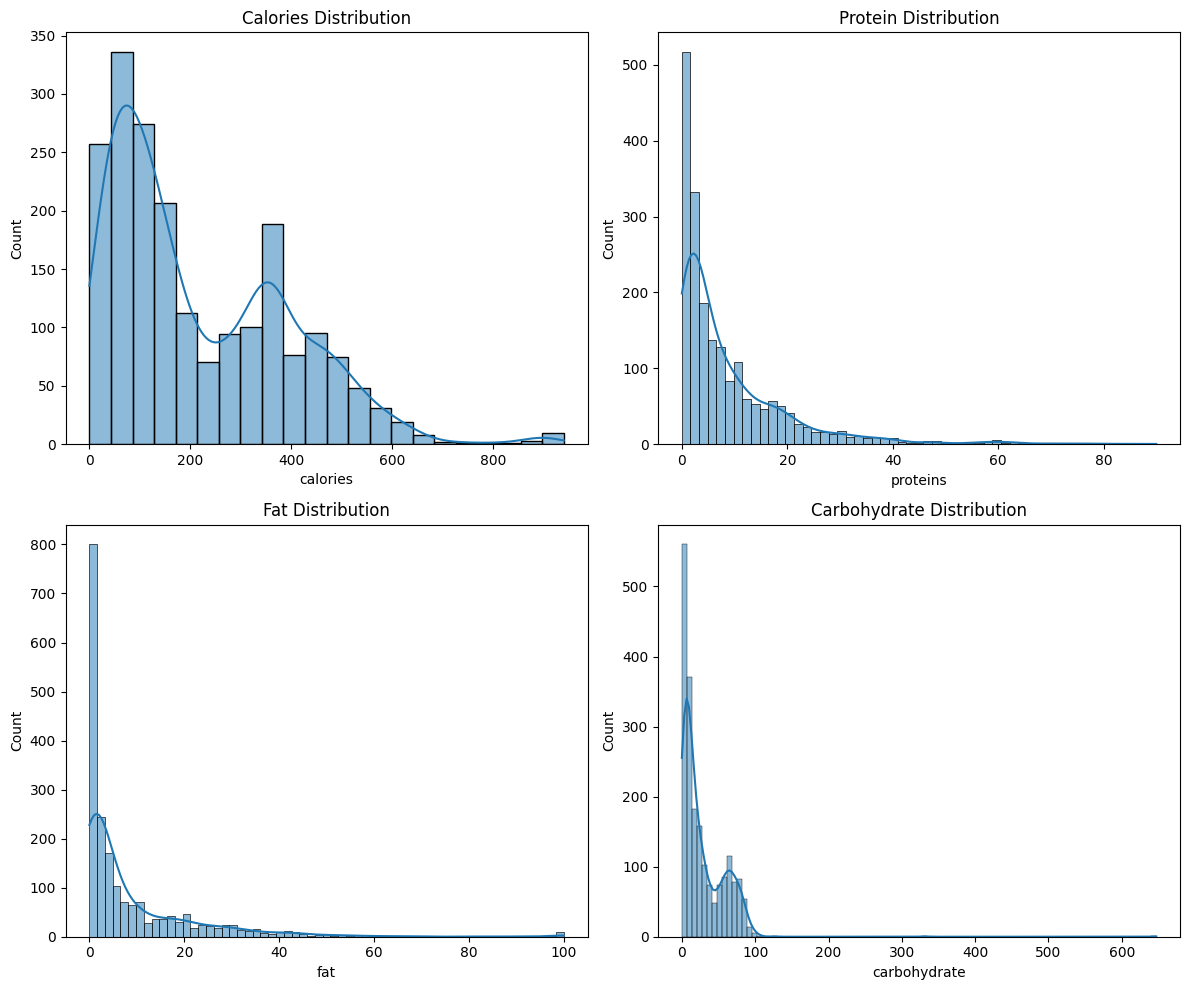

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for nutritional distribution plots
plt.figure(figsize=(12, 10))

# Distribution of Calories
plt.subplot(2, 2, 1)
sns.histplot(combined_df['calories'], kde=True)
plt.title('Calories Distribution')

# Distribution of Proteins
plt.subplot(2, 2, 2)
sns.histplot(combined_df['proteins'], kde=True)
plt.title('Protein Distribution')

# Distribution of Fat
plt.subplot(2, 2, 3)
sns.histplot(combined_df['fat'], kde=True)
plt.title('Fat Distribution')

# Distribution of Carbohydrates
plt.subplot(2, 2, 4)
sns.histplot(combined_df['carbohydrate'], kde=True)
plt.title('Carbohydrate Distribution')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate IQR for each nutritional column
Q1 = combined_df[['calories', 'proteins', 'fat', 'carbohydrate']].quantile(0.25)
Q3 = combined_df[['calories', 'proteins', 'fat', 'carbohydrate']].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with values outside the IQR bounds
combined_df = combined_df[~(
    (combined_df[['calories', 'proteins', 'fat', 'carbohydrate']] < lower_bound) |
    (combined_df[['calories', 'proteins', 'fat', 'carbohydrate']] > upper_bound)
).any(axis=1)]

# Display descriptive statistics after removing outliers
print("Dataset after outlier removal:")
print(combined_df.describe())


Dataset after outlier removal:
                id     calories     proteins          fat  carbohydrate
count  1708.000000  1708.000000  1708.000000  1708.000000   1708.000000
mean    562.373536   178.967184     6.145626     5.000451     28.168940
std     375.824210   142.877536     6.329398     6.545802     27.325828
min       1.000000     0.000000     0.000000     0.000000      0.000000
25%     249.750000    63.457500     1.300000     0.400000      6.300000
50%     500.000000   127.000000     3.700000     2.000000     15.750000
75%     856.250000   299.250000     9.125000     7.000000     50.125000
max    1346.000000   640.000000    27.600000    26.700000    100.000000


Correlation Matrix:
              calories  proteins       fat  carbohydrate
calories      1.000000  0.294103  0.594951      0.816880
proteins      0.294103  1.000000  0.294732      0.021828
fat           0.594951  0.294732  1.000000      0.231483
carbohydrate  0.816880  0.021828  0.231483      1.000000


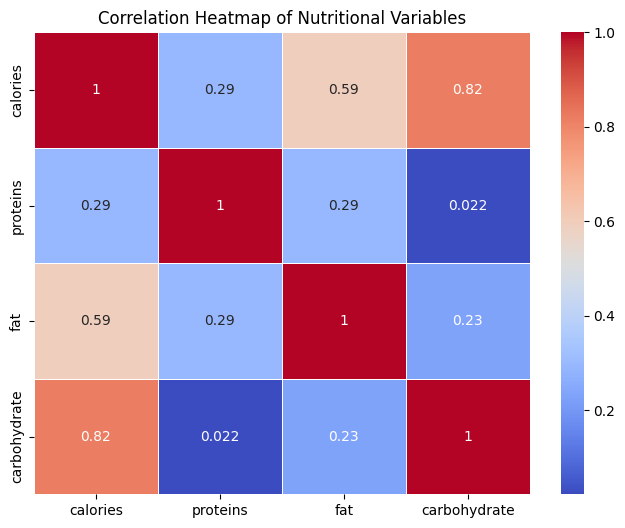

In [ ]:
# Generate the correlation matrix for nutritional variables
correlation_matrix = combined_df[['calories', 'proteins', 'fat', 'carbohydrate']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Nutritional Variables')
plt.show()


#Advanced Preprocessing

In [14]:
# Function to categorize products as Food or Drink based on keywords in the 'name' column
def categorize_product(name):
    name = name.lower()  # Convert product name to lowercase for easier keyword matching
    # Keywords for products that are likely drink items
    if ("minuman" in name or "drink" in name or "teh" in name or "kopi" in name or
          "susu" in name or "milk" in name or "juice" in name or "jus" in name or
          "coffee" in name or "tea" in name or "soda" in name or
          "soft drink" in name or "carbonated" in name or
          "cola" in name or "botol" in name or "smoothie" in name or
          "shake" in name or "lemonade" in name or "cider" in name or "cocktail" in name or
          "tonic" in name or "water" in name):
        return "Drink"
    # If no keywords match, default to "Food"
    else:
        return "Food"

# Apply the function to create a new 'category' column
combined_df['category'] = combined_df['name'].apply(categorize_product)

# Verify the distribution of each category
print("Number of products per category:")
print(combined_df['category'].value_counts())

# Display a sample of products in each category to validate categorization
print("\nSample products in the Food category:")
print(combined_df[combined_df['category'] == 'Food'][['name', 'calories', 'proteins', 'fat', 'carbohydrate']].head(20))

print("\nSample products in the Drink category:")
print(combined_df[combined_df['category'] == 'Drink'][['name', 'calories', 'proteins', 'fat', 'carbohydrate']].head(20))

Number of products per category:
category
Food     1555
Drink     153
Name: count, dtype: int64

Sample products in the Food category:
                             name  calories  proteins   fat  carbohydrate
2                       Agar-agar       0.0       0.0   0.2           0.0
3              Akar tonjong segar      45.0       1.1   0.4          10.8
4                   Aletoge segar      37.0       4.4   0.5           3.8
5                   Alpukat segar      85.0       0.9   6.5           7.7
6              Ampas kacang hijau      96.0       3.7   0.6          19.1
7                      Ampas Tahu     414.0      26.6  18.3          41.3
8                Ampas tahu kukus      75.0       4.1   2.1          10.7
9               Ampas tahu mentah      67.0       5.0   2.1           8.1
10   Anak sapi daging gemuk segar     184.0      18.8  14.0           0.0
11   Anak sapi daging kurus segar     174.0      19.6  10.0           0.0
12  Anak sapi daging sedang segar     190.0      19

In [15]:
combined_df.to_csv('new_dataset.csv', index=False)